In [1]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
from skbio import OrdinationResults

%matplotlib inline

from scipy import stats

data_dir = 'Alien_data'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df_meta = pd.read_csv('Alien_data/str_metadata.tsv',sep='\t')

### Plot the unweighted unifrac:

In [3]:
pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/unweighted_unifrac_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)
pcs_data = pcs.samples.iloc[:,:3]
pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']
pcs_data.reset_index(inplace=True)
pcs_data = pcs_data.rename(columns = {'index':'sampleid'})
unweighted=pcs_data.merge(df_meta, how='inner', on='sampleid')


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


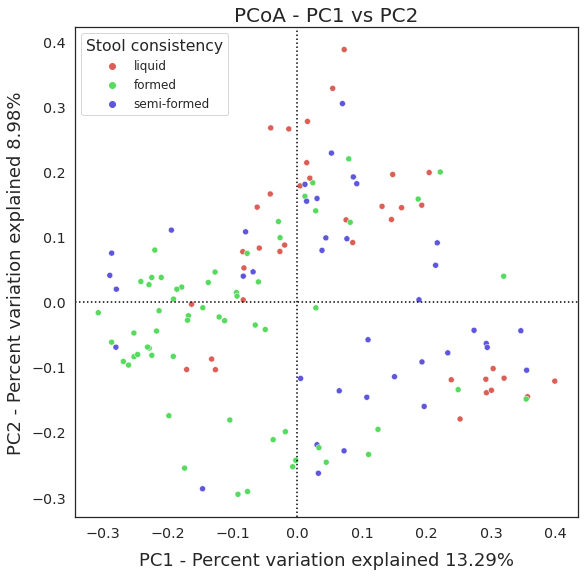

In [6]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=unweighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=unweighted['stool_consistency'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 13.29%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.98%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Stool consistency', loc='upper left', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('stool_consistency_unweighted.png',dpi=200, bbox_inches='tight')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


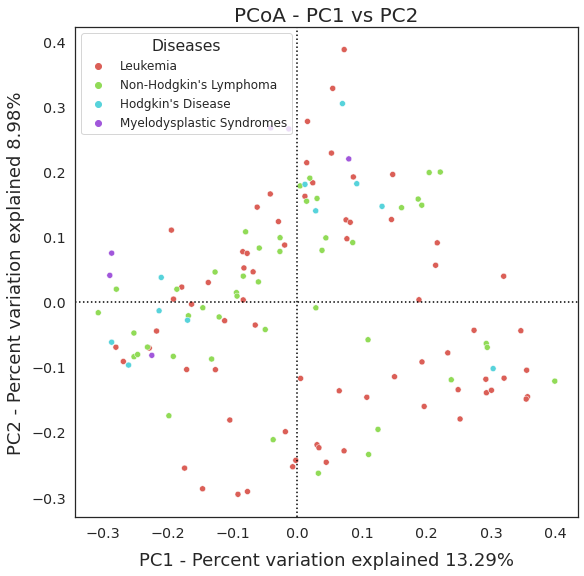

In [4]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=unweighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=unweighted['disease'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 13.29%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.98%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Diseases', loc='upper left', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('disease_unweighted.png',dpi=200, bbox_inches='tight')

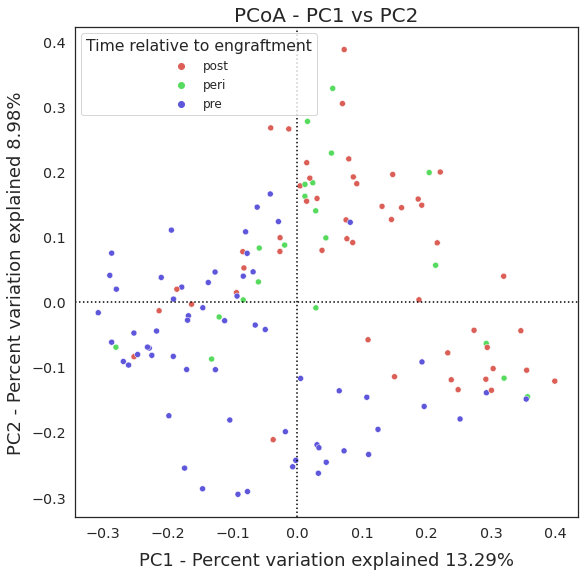

In [5]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=unweighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=unweighted['categorical_time_relative_to_engraftment'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 13.29%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.98%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Time relative to engraftment', loc='upper left', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('time_to_engraftment_unweighted.png',dpi=200, bbox_inches='tight')

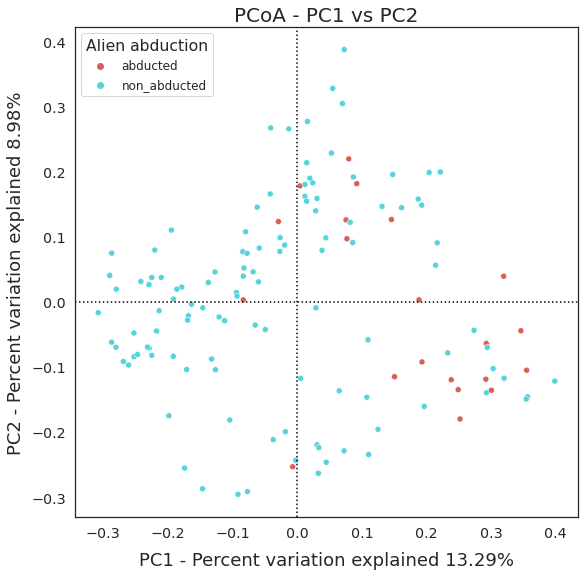

In [6]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=unweighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=unweighted['alleged_abduction'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 13.29%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.98%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Alien abduction', loc='upper left', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('abduction_unweighted.png',dpi=200, bbox_inches='tight')

### Plot the weighted unifrac:

In [3]:
pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/weighted_unifrac_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)
pcs_data = pcs.samples.iloc[:,:3]
pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']
pcs_data.reset_index(inplace=True)
pcs_data = pcs_data.rename(columns = {'index':'sampleid'})
weighted=pcs_data.merge(df_meta, how='inner', on='sampleid')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


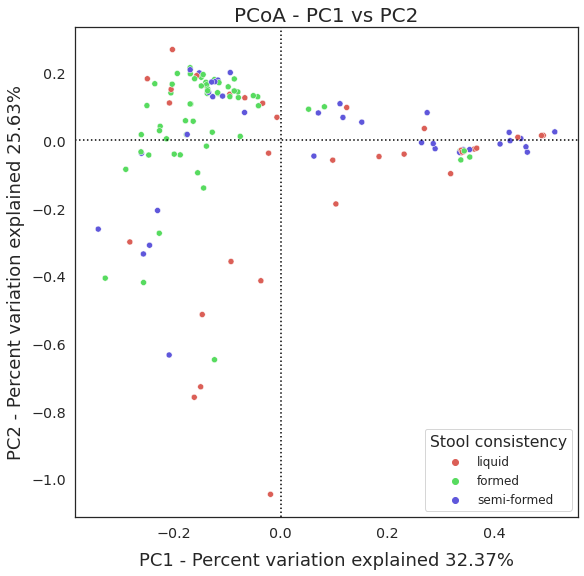

In [4]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=weighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=weighted['stool_consistency'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 32.37%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 25.63%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Stool consistency', loc='lower right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('stool_consistency_weighted.png',dpi=200, bbox_inches='tight')

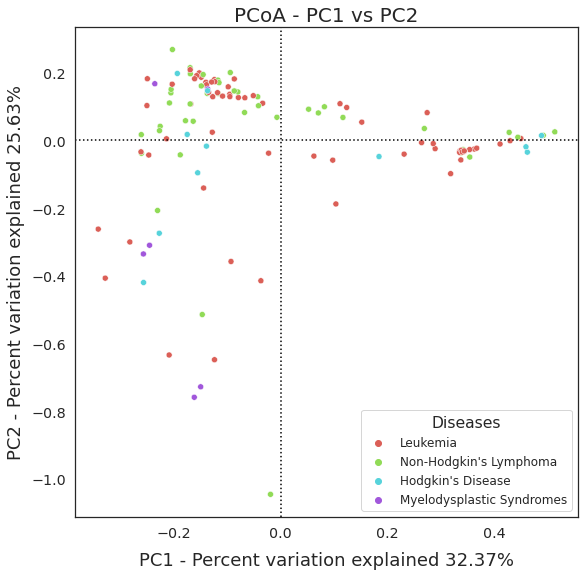

In [5]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=weighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=weighted['disease'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 32.37%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 25.63%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Diseases', loc='lower right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('disease_weighted.png',dpi=200, bbox_inches='tight')

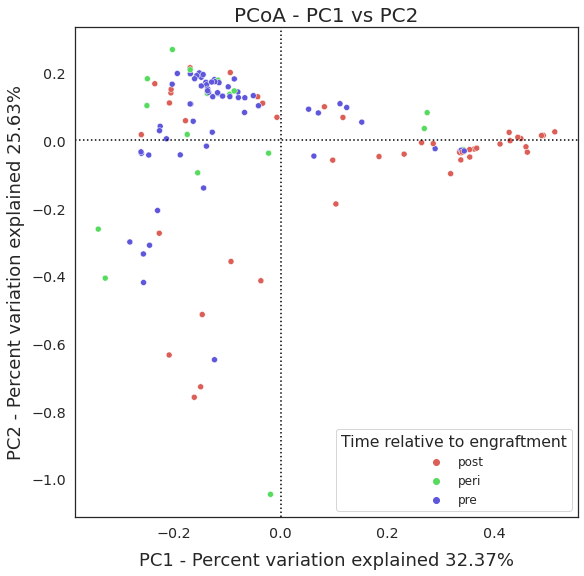

In [6]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=weighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=weighted['categorical_time_relative_to_engraftment'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 32.37%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 25.63%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Time relative to engraftment', loc='lower right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('time_to_engraftment_weighted.png',dpi=200, bbox_inches='tight')

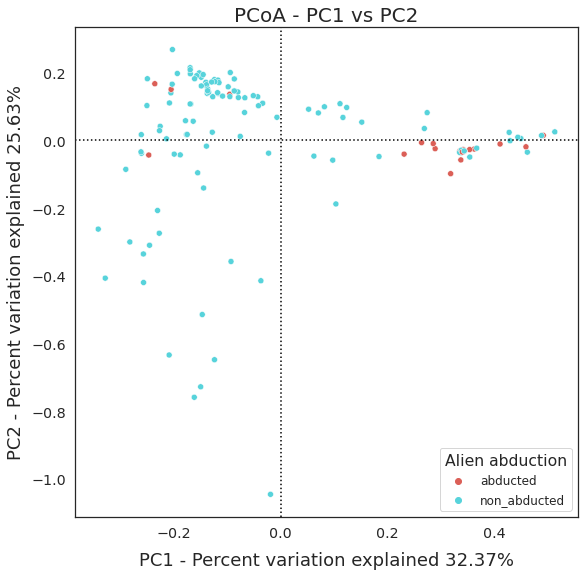

In [7]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=weighted, 
        x='Axis 1', 
        y='Axis 2',
        hue=weighted['alleged_abduction'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 32.37%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 25.63%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Alien abduction', loc='lower right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('abduction_weighted.png',dpi=200, bbox_inches='tight')

### Plot the bray_curtis:

In [8]:
pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/bray_curtis_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)
pcs_data = pcs.samples.iloc[:,:3]
pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']
pcs_data.reset_index(inplace=True)
pcs_data = pcs_data.rename(columns = {'index':'sampleid'})
bray=pcs_data.merge(df_meta, how='inner', on='sampleid')

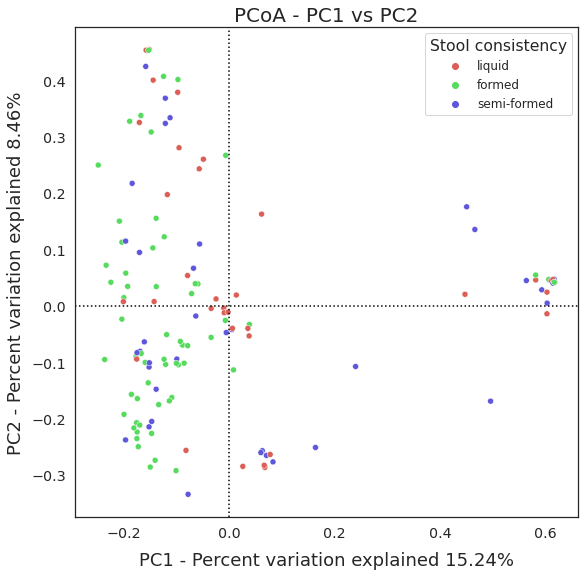

In [9]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=bray, 
        x='Axis 1', 
        y='Axis 2',
        hue=bray['stool_consistency'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 15.24%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.46%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Stool consistency', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('stool_consistency_bray_curtis.png',dpi=200, bbox_inches='tight')

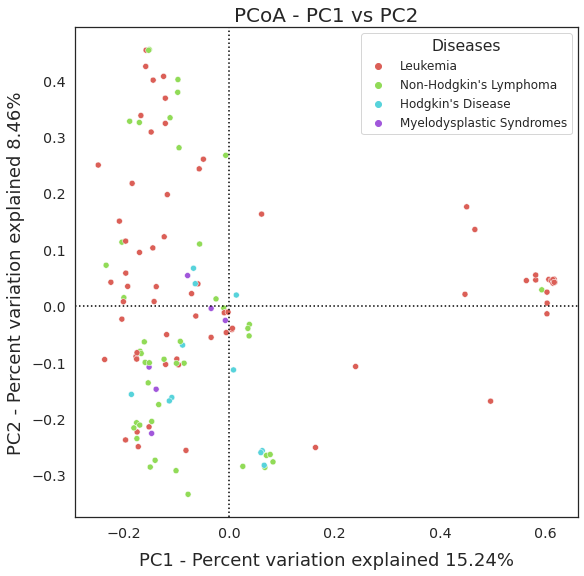

In [10]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=bray, 
        x='Axis 1', 
        y='Axis 2',
        hue=bray['disease'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 15.24%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.46%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Diseases', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('disease_bray_curtis.png',dpi=200, bbox_inches='tight')

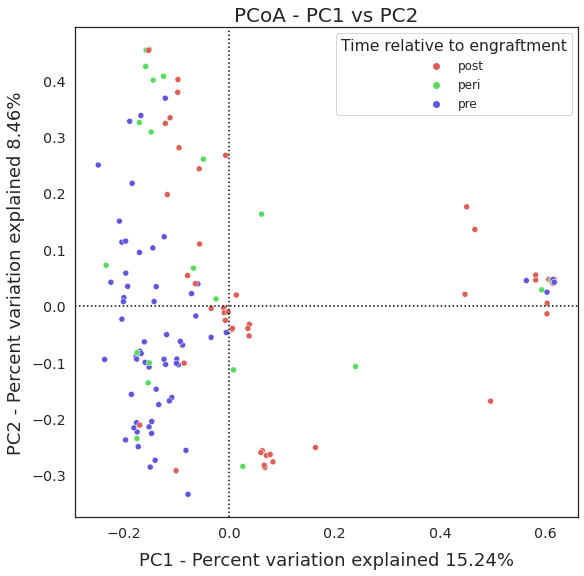

In [11]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=bray, 
        x='Axis 1', 
        y='Axis 2',
        hue=bray['categorical_time_relative_to_engraftment'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 15.24%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.46%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Time relative to engraftment', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('time_to_engraftment_bray_curtis.png',dpi=200, bbox_inches='tight')

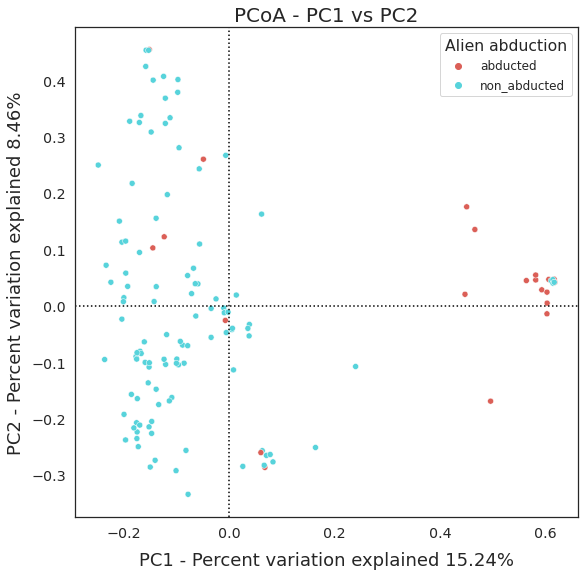

In [12]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=bray, 
        x='Axis 1', 
        y='Axis 2',
        hue=bray['alleged_abduction'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 15.24%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 8.46%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Alien abduction', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('abduction_bray_curtis.png',dpi=200, bbox_inches='tight')

### Plot the Jaccard:

In [13]:
pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/jaccard_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)
pcs_data = pcs.samples.iloc[:,:3]
pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']
pcs_data.reset_index(inplace=True)
pcs_data = pcs_data.rename(columns = {'index':'sampleid'})
jaccard=pcs_data.merge(df_meta, how='inner', on='sampleid')

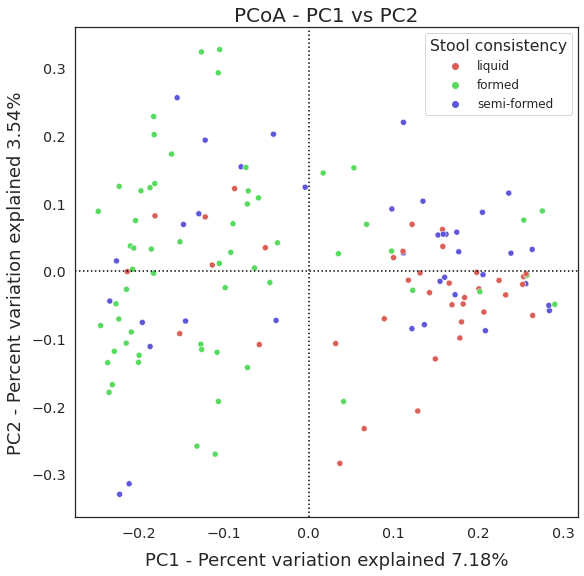

In [14]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=jaccard, 
        x='Axis 1', 
        y='Axis 2',
        hue=jaccard['stool_consistency'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 7.18%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 3.54%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Stool consistency', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('stool_consistency_jaccard.png',dpi=200, bbox_inches='tight')

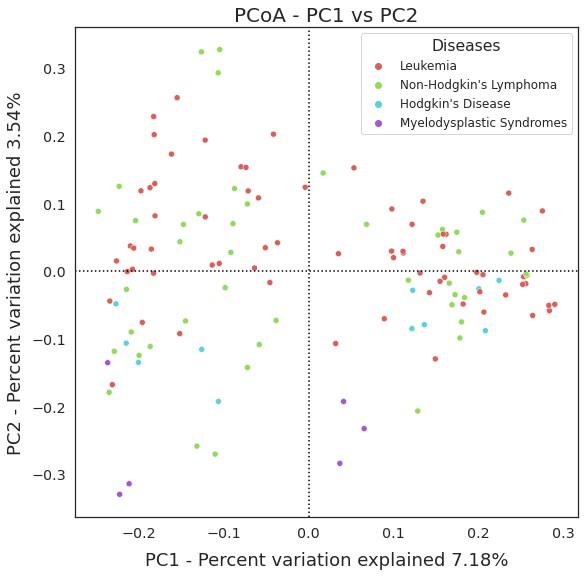

In [15]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=jaccard, 
        x='Axis 1', 
        y='Axis 2',
        hue=jaccard['disease'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 7.18%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 3.54%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Diseases', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('disease_jaccard.png',dpi=200, bbox_inches='tight')

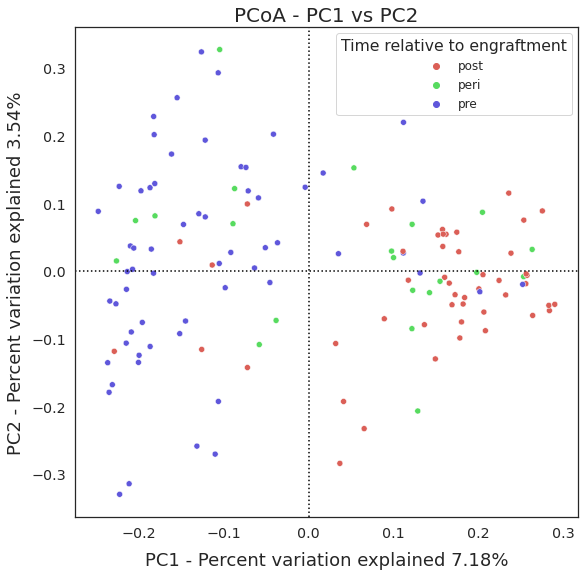

In [16]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=jaccard, 
        x='Axis 1', 
        y='Axis 2',
        hue=jaccard['categorical_time_relative_to_engraftment'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 7.18%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 3.54%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Time relative to engraftment', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('time_to_engrafement_jaccard.png',dpi=200, bbox_inches='tight')

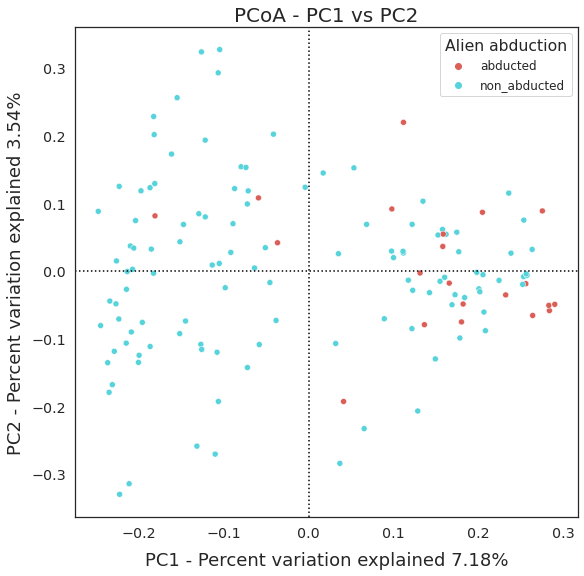

In [17]:
sns.set(rc={'figure.figsize':(9, 9), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's scatter plot
    ax = sns.scatterplot(
        data=jaccard, 
        x='Axis 1', 
        y='Axis 2',
        hue=jaccard['alleged_abduction'],
        palette='hls'
    )
    
    ax.set_xlabel('PC1 - Percent variation explained 7.18%', fontsize=18)
    ax.set_ylabel('PC2 - Percent variation explained 3.54%', fontsize=18)
    ax.axhline(0, color='black', linestyle=":")
    ax.axvline(0, color='black', linestyle=":")
    ax.legend(title='Alien abduction', loc='upper right', fontsize='12')
    ax.set_title("PCoA - PC1 vs PC2", size=20)
    ax.xaxis.set_label_coords(0.5, -0.07)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    plt.savefig('abduction_jaccard.png',dpi=200, bbox_inches='tight')